# GRIP_JUNE_2023_THE SPARKS FOUNDATION

# AUTHOR: SUNDAR RAJAN SESHADRI

# Task 2 - Predicting the optimum number of cluster and represent it visually.

## Import Necessary Libraries ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
#read the iris dataset

In [4]:
df = pd.read_csv("iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#check for null values

df.isnull().sum()

#there are no null values in our dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#5 point summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# Data Visualization

In [8]:
#Now, let's check for unique classes in the dataset

print(f"total number of unique classes are {df.Species.nunique()}")

total number of unique classes are 3


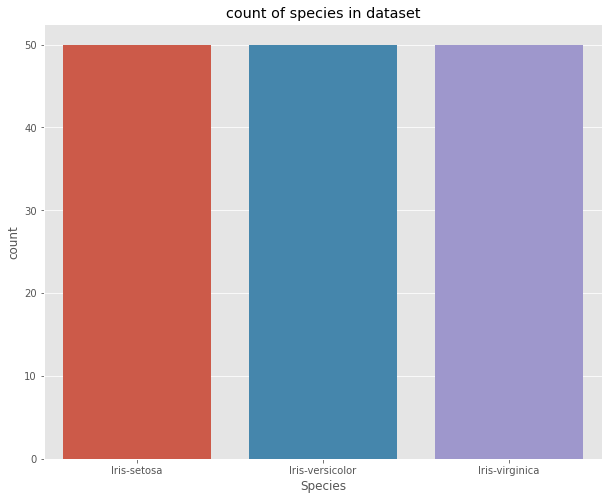

In [9]:
#plotting

sns.countplot(x = 'Species', data=df)
plt.title("count of species in dataset")
plt.show()

In [10]:
#we have all three species with equal observation values

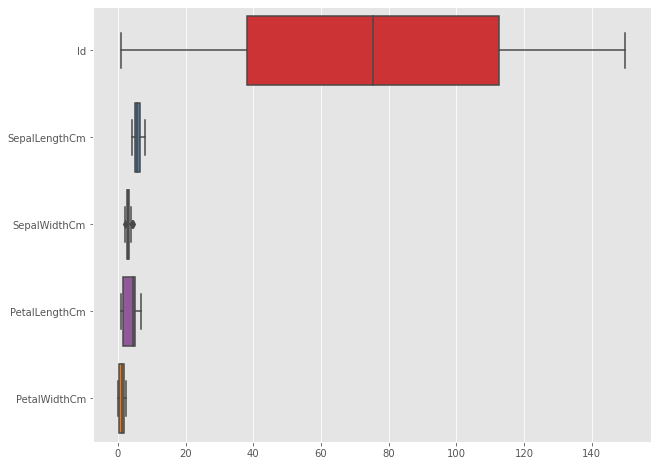

In [11]:
sns.boxplot(data=df, orient="h", palette = "Set1")
plt.show()

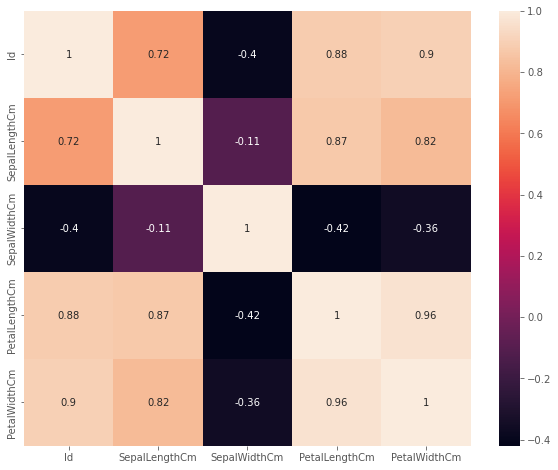

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
#preparing the data

X = df.drop(['Species'], axis = 1)
X = X.values

# Finding optimal value of K

-> to find optimal value of k in the k-means algorithm there are two ways 

        1. Elbow plot
        2. Sillhoute score

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
wcss = [] #within cluster sum of squares

silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)

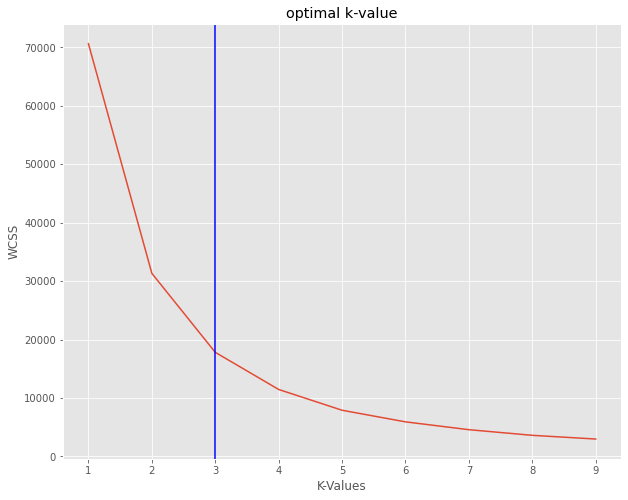

In [21]:
plt.plot(range(1,10), wcss)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.axvline(x=3, color="b")
plt.title("optimal k-value")
plt.show()

From K= 1 to K= 2, there is large drop From K= 2 to K= 3, there is slight drop After K= 3, slop is almost constant

Hence, value of K=3 implies an Optimal Value of K-Clusters

In [23]:
#print the silhoutte scores

for k, score in enumerate(silhouette_scores, start=2):
    print(f"K = {k}, silhouette score = {score}")
    

K = 2, silhouette score = 0.6204656046551029
K = 3, silhouette score = 0.5821934246576435
K = 4, silhouette score = 0.5566188243199989
K = 5, silhouette score = 0.5409296814623595
K = 6, silhouette score = 0.534056905082513
K = 7, silhouette score = 0.5180342215733441
K = 8, silhouette score = 0.5095873785767553
K = 9, silhouette score = 0.5052565134859816
K = 10, silhouette score = 0.496904419964787


Text(0.5, 1.0, 'silhoutte score plot')

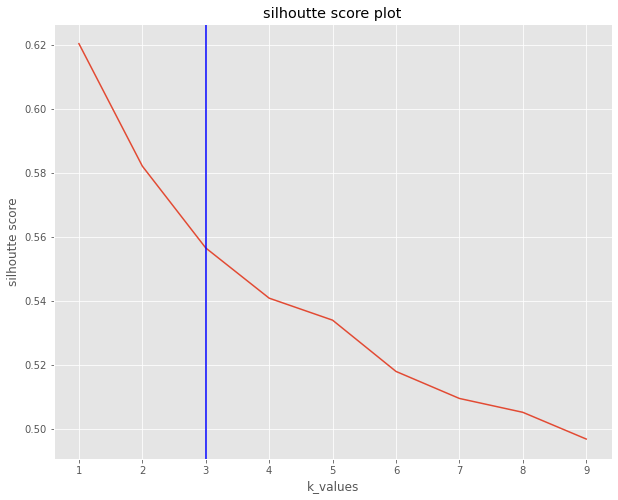

In [24]:
#plotting the scores

plt.plot(range(1,10), silhouette_scores)
plt.xlabel('k_values')
plt.ylabel('silhoutte score')
plt.axvline(x=3, color='b')
plt.title('silhoutte score plot')

In [25]:
#from both elbow plot and silhouette score we can say that optimal k_value is 3

In [27]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [35]:
y_label = kmeans.fit_predict(X)

In [32]:
#cluster visualization

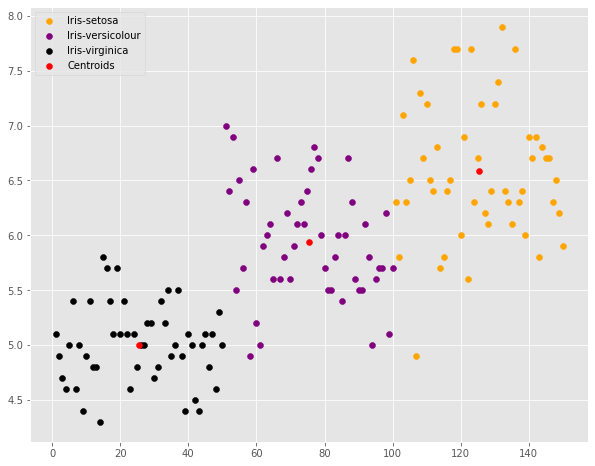

In [38]:
plt.scatter(X[y_label == 0, 0], X[y_label == 0, 1], 
             c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 0], X[y_label == 1, 1], 
             c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 0], X[y_label == 2, 1],
             c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'red', label = 'Centroids')

plt.legend()
plt.show()